In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack, arange, fft
from sklearn.metrics import mean_squared_error
from time import time

In [2]:
df = pd.read_csv('AEP_hourly_processed.csv')

In [3]:
df.head()

,Datetime,AEP_MW,Date,Year,Month,Day,Hour,Weekday,Holiday,WorkingHour
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,1,Friday,0,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,1,2,Friday,0,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,1,3,Friday,0,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,1,4,Friday,0,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,1,5,Friday,0,0


In [4]:
def annot_max(x, y, pos=0.96, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    text = f"x={xmax:.3f}, y={ymax:.3f}, (period: {(1./xmax):.2f} hours)"
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax),  xytext=(0.94, pos), **kw)

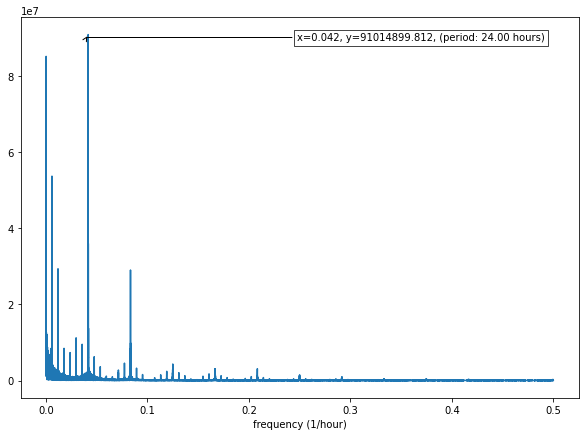

In [5]:
nobs = len(df['AEP_MW'])
fourier = np.abs(rfft(df['AEP_MW']))
frequencies = rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(frequencies[2:], fourier[2:])
annot_max(frequencies[2:], fourier[2:])

plt.xlabel('frequency (1/hour)')
plt.show()

In [6]:
def low_pass(s, threshold=2e4):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=(2e-2/s.size))
    fourier[frequencies > threshold] = 0
    return irfft(fourier, s.size)

In [7]:
start = time()
df['AEP_MW_Smoothed'] = low_pass(df['AEP_MW'])
end = time()

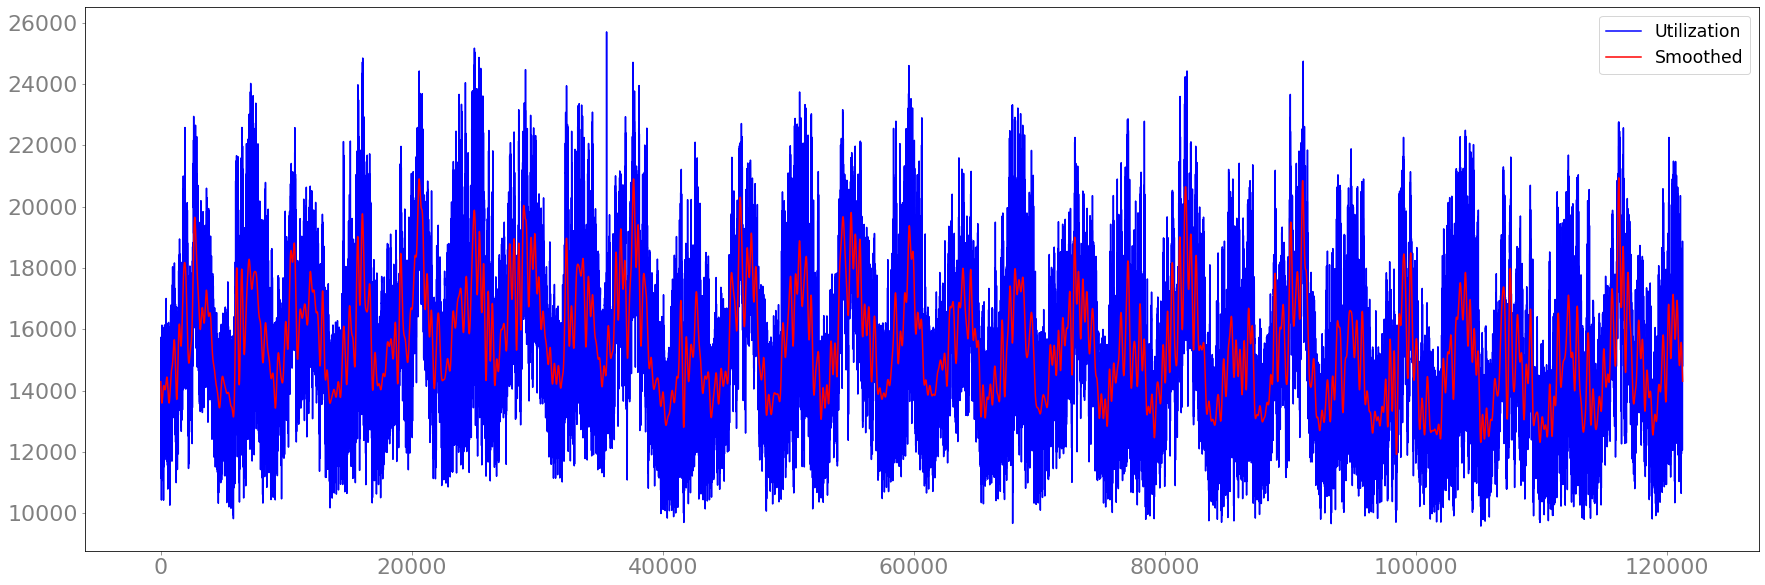

In [8]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(np.arange(0, len(df["Datetime"])), df["AEP_MW"], c='blue', label='Utilization')
ax.plot(np.arange(0, len(df["Datetime"])), df["AEP_MW_Smoothed"], c='red', label='Smoothed')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

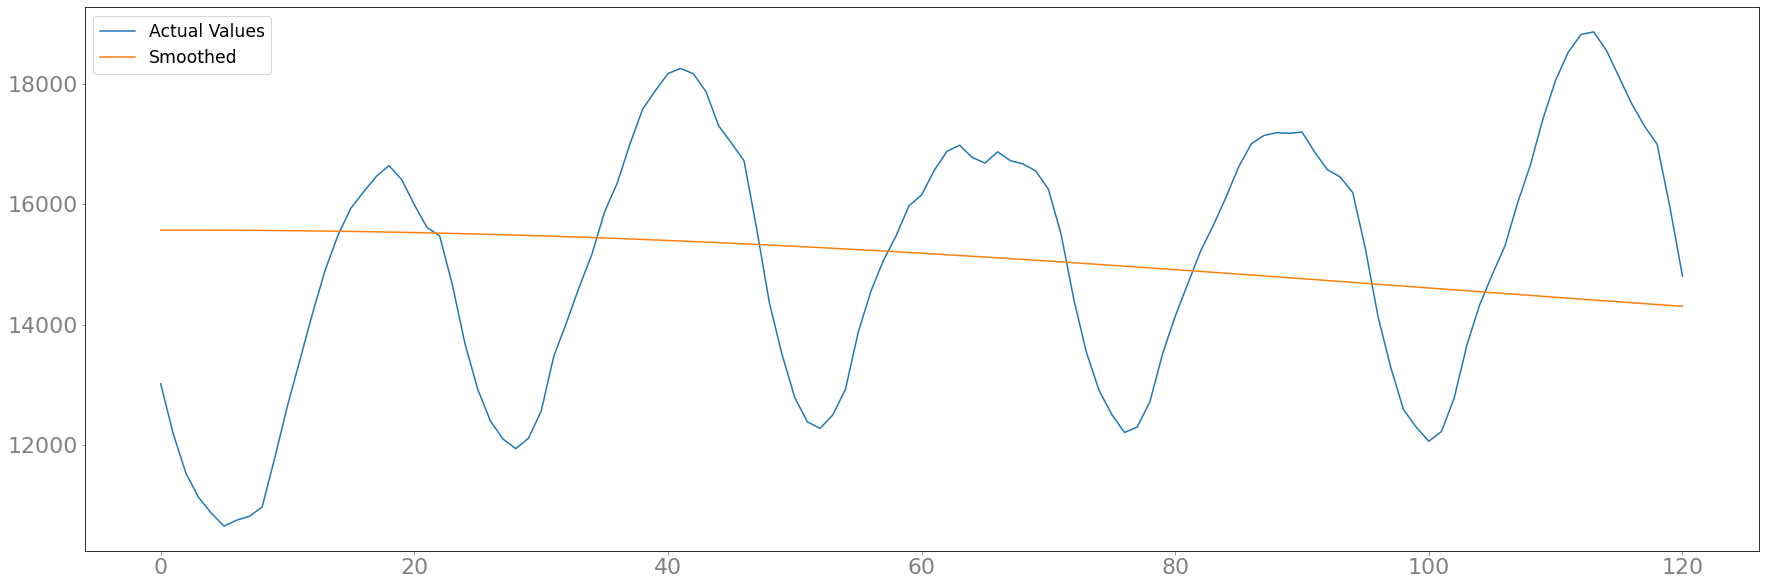

In [9]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(df.loc[len(df["AEP_MW"])-121:, "AEP_MW"].values, label='Actual Values')
ax.plot(df.loc[len(df["AEP_MW_Smoothed"])-121:, "AEP_MW_Smoothed"].values, label='Smoothed')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

In [12]:
rmse = mean_squared_error(df.loc[len(df["AEP_MW"])-121:, "AEP_MW"].values, df.loc[len(df["AEP_MW_Smoothed"])-121:, "AEP_MW_Smoothed"].values)**0.5
print("Test RMSE: %.3f" % (rmse*10))
print("Total time taken to forecast: %.3f" % abs(start-end))

Test RMSE: 23221.410
Total time taken to forecast: 0.127
